# PPT

##### 벡터 * 행렬 = 벡터
##### EX) [2 -1 3 1] * [1 5 ; 2 6 ; 3 7 ; 4 8] = [13 33]
##### EX2) 벡터(수면시간, 운동시간, 칼로리 섭취량) -함수(행렬)-> 벡터(체중, 혈압)
##### 행렬을 만들기 위해서는 많은 데이터가 필요함 (빅데이터)
##### <사례1> 수면시간 8시간, 운동시간 0시간, 칼로리 섭취량 2500kcal -> 체중 80kg, 혈압 150
##### .... <사례10000> 수면시간 6시간, 운동시간 3시간, 칼로리 섭취량 1100kcal -> 체중 55kg, 혈압 90
##### 먼저 행렬에 아무 값이나 넣음 -> 예측값과 정답을 비교해서 차이만큼 행렬값을 조정하기 -> 사례10000까지 이 과정을 반복함(epoch)
##### 입력-출력 사이에 층위를 더할 수도 있음! (벡터 -행렬-> 벡터 -행렬-> 벡터) 딥러닝은 이런 벡터 층위들을 많이 넣은 것!
##### 응용 : 음성인식, 음성합성, 위기경보, 스팸필터, 감정분석, 바둑, 그림변형, 로봇제어, 자동번역, 얼굴인식, 문자인식, 경제예측
##### 요약 : 인공지능의 대표선수가 인공 신경망, 어떤 입력을 출력으로 예측하는 함수, 입력과 출력은 벡터, 함수는 행렬, 데이터만 있으면 행렬을 추정해낼 수 있음, 이 행렬 자체가 인공신경망!

##### ax1 + bx2 + c = y 에서 입력은 2개, 출력은 1개! (동그라미가 세 개 있다고 해서 입력이 3개가 아님!)
##### 입력 출력 개수를 정함 -> 동그라미 그림을 구현함 

# import modules

In [2]:
pip install tensorflow


The following command must be run outside of the IPython shell:

    $ pip install tensorflow

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### panda는 엑셀 불러옴, numpy는 ?, matplotlib는 plot을 하기 위해서 불러옴, tensorflow는 머신러닝에서 대세

# data preparation and visualization

In [4]:
data = pd.read_csv('regression.csv', delimiter = ',')
data

,X,Y
0,3.300,1.700
1,4.400,2.760
2,5.500,2.090
3,6.710,3.190
4,6.930,1.694
5,4.168,1.573
6,9.779,3.366
7,6.182,2.596
8,7.590,2.530
9,2.167,1.221


##### 대표적인 regression

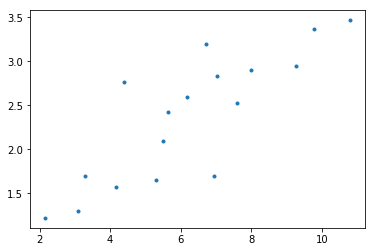

In [3]:
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']
plt.plot(X, Y, '.')

##### data라는 변수에 regression.csv가 담겨 있는 상태!
##### data에 있는 X coloumn과 Y coloumn을 각각 받아줌
##### visualization을 하니 눈으로는 확인할 수 없었던 패턴이 보임

##### pd.read_csv('파일 이름')
##### plot을 해주는 모듈은 matplotlib.pyplot, 행렬의 형태로 만들어주는 것은 numpy
##### a, b 값을 구하는 것 자체가 데이터를 가장 잘 설명하는 선을 구하는 것!
##### x1, x2, y가 있는 3차원 공간에서 a, b, c값이 구해진다고 하면? 무한대로 나가는 평면이 구해지는 것!

# create model

In [5]:
model = Sequential()
model.add(Dense(1, input_shape=[1]))
model.compile(optimizer="sgd", loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


##### 입력 벡터에서 출력 벡터로 가는 것이 하나의 sequence가 됨
##### Dense의 입력 부분에서 1은 Y의 개수(출력부, 출력차원)이고, input_shape의 1은 X의 개수(입력부, 입력차원)이다! -> 즉, Y=aX+b!
##### 마지막 줄의 sgd는 오차를 반복해서 줄이는 과정을 표현한 것이고, mse는 출력분과 실제 정답 부분의 차이를 mean squared error로 표현한 것

##### 식을 세우는 것 자체를 model이라고 함 (ax+b = y)
##### model.add(Dense(1, input_shape=[1])) 이 한줄이 ax+b = y의 동그라미 그림을 만들어 주는 것!
##### x가 2개면 shape = [1]에 [2]를 적고, y가 2개면 1에 2를 적으면 됨!
##### x와 y가 모두 연결되어 있으면 fully connected 됐다고 하고, 이를 Dense라 함. 그런데 몇 개 빠져서 듬성듬성한 모델이 발달한 것이 있고, 이는 뒤에 가서 배울 것!
##### sgd : 예측값과 정답 간의 차이를 살펴보고 차이만큼을 a, b에 다시 반영해 주는 반복 과정 (차이를 가지고 어떻게 parameter를 바꿀 것인지 정함)
##### loss : 예측값과 정답의 차이를 단순히 반영하는 것이 아니라, mean squared error를 구하는 것 (차이를 정의함)

In [11]:
model = Sequential()
model.add(Dense(10, input_shape=[1]))
model.add(Dense(3), activation = 'relu'))
model.add(Dense(6), activation = 'tanh'))
model.add(Dense(1), activation = 'sigmoid')
model.compile(optimizer="rmsprop", loss='mse')

SyntaxError: invalid syntax (<ipython-input-11-4dc43cf36e46>, line 3)

##### sequential을 하는 순간 입력에서 출력 방향으로 가겠다고 방향성을 지정함
##### 여기서 input_shape는 입력값이 1개라는 의미 (동그라미는 2개 = 입력부분이 2개)
##### nonlinearity : sgd를 rmsprop로 대체함
##### Hidden layer를 넣는 방법 : model.add(Dense(3)) (하나를 넣어준 것)
##### 시험문제 : 이 식을 보고 graph를 그릴 수 있어야 하고, graph를 보고 식을 쓸 수 있어야 함!
##### layer별로 nonlinearity를 부여 : activation = 'sigmoid'
##### relu는 0 이하는 0으로, 0 이상은 linear하게 만들어줌. tanh는 -1부터 1까지 보여줌
##### activation = 'linear'는 아무것도 안 적은 것과 똑같음
##### 모르겠는 점 : 왜 숫자가 저렇게 됨? 마지막은 왜 1?
##### 오류 : relu 부분이 잘못됬다고 나옴

# train model

In [5]:
model.fit(X, Y, epochs = 1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
17/17 [==============================] - 1s 35ms/sample - loss: 156.2797
Epoch 2/1000
17/17 [==============================] - 0s 293us/sample - loss: 1.6518
Epoch 3/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.2032
Epoch 4/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1894
Epoch 5/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1892
Epoch 6/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1890
Epoch 7/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1888
Epoch 8/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1886
Epoch 9/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1885
Epoch 10/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1883
Epoch 11/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1881
Epoch 12/1000


Epoch 94/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1768
Epoch 95/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1766
Epoch 96/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1765
Epoch 97/1000
17/17 [==============================] - 0s 294us/sample - loss: 0.1764
Epoch 98/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1763
Epoch 99/1000
17/17 [==============================] - 0s 411us/sample - loss: 0.1762
Epoch 100/1000
17/17 [==============================] - 0s 704us/sample - loss: 0.1761
Epoch 101/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1760
Epoch 102/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1759
Epoch 103/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1758
Epoch 104/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1757
Epoch 105/1000
17/17 [===========================

Epoch 189/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1683
Epoch 190/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1682
Epoch 191/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1681
Epoch 192/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1681
Epoch 193/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1680
Epoch 194/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1679
Epoch 195/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1679
Epoch 196/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1678
Epoch 197/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1677
Epoch 198/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1677
Epoch 199/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1676
Epoch 200/1000
17/17 [=====================

Epoch 284/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1629
Epoch 285/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1629
Epoch 286/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1629
Epoch 287/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1628
Epoch 288/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1628
Epoch 289/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1627
Epoch 290/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1627
Epoch 291/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1626
Epoch 292/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1626
Epoch 293/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1626
Epoch 294/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1625
Epoch 295/1000
17/17 [==============================] - 0s 0s/sample - loss:

Epoch 382/1000
17/17 [==============================] - 0s 647us/sample - loss: 0.1595
Epoch 383/1000
17/17 [==============================] - 0s 51us/sample - loss: 0.1595
Epoch 384/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1594
Epoch 385/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1594
Epoch 386/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1594
Epoch 387/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1594
Epoch 388/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1593
Epoch 389/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1593
Epoch 390/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1593
Epoch 391/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1593
Epoch 392/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1592
Epoch 393/1000
17/17 [==============================] - 0s 0s/sample - 

Epoch 478/1000
17/17 [==============================] - 0s 587us/sample - loss: 0.1574
Epoch 479/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1574
Epoch 480/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1574
Epoch 481/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1573
Epoch 482/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1573
Epoch 483/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1573
Epoch 484/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1573
Epoch 485/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1573
Epoch 486/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1573
Epoch 487/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1572
Epoch 488/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1572
Epoch 489/1000
17/17 [=====================

Epoch 573/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1561
Epoch 574/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1561
Epoch 575/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1561
Epoch 576/1000
17/17 [==============================] - 0s 411us/sample - loss: 0.1561
Epoch 577/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 578/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 579/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1560
Epoch 580/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 581/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 582/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 583/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1560
Epoch 584/1000
17/17 [=====================

Epoch 668/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1553
Epoch 669/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1553
Epoch 670/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1552
Epoch 671/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1552
Epoch 672/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1552
Epoch 673/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1552
Epoch 674/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1552
Epoch 675/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1552
Epoch 676/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1552
Epoch 677/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1552
Epoch 678/1000
17/17 [==============================] - 0s 352us/sample - loss: 0.1552
Epoch 679/1000
17/17 [=====================

Epoch 763/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1547
Epoch 764/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 765/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 766/1000
17/17 [==============================] - 0s 158us/sample - loss: 0.1547
Epoch 767/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1547
Epoch 768/1000
17/17 [==============================] - 0s 439us/sample - loss: 0.1547
Epoch 769/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 770/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1547
Epoch 771/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 772/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 773/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1547
Epoch 774/1000
17/17 [========================

Epoch 858/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1544
Epoch 859/1000
17/17 [==============================] - 0s 235us/sample - loss: 0.1544
Epoch 860/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1544
Epoch 861/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1544
Epoch 862/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1544
Epoch 863/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1544
Epoch 864/1000
17/17 [==============================] - 0s 231us/sample - loss: 0.1544
Epoch 865/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1544
Epoch 866/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1544
Epoch 867/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1544
Epoch 868/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1544
Epoch 869/1000
17/17 [==============================] -

Epoch 953/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1542
Epoch 954/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1542
Epoch 955/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1542
Epoch 956/1000
17/17 [==============================] - 0s 176us/sample - loss: 0.1542
Epoch 957/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1542
Epoch 958/1000
17/17 [==============================] - 0s 121us/sample - loss: 0.1542
Epoch 959/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1542
Epoch 960/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1542
Epoch 961/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1542
Epoch 962/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1542
Epoch 963/1000
17/17 [==============================] - 0s 0s/sample - loss: 0.1542
Epoch 964/1000
17/17 [==============================] - 0s

##### X와 Y의 값을 fit해주고 반복훈련을 통해 a와 b값을 받음!

##### model.fit([X,Y])라고 쓰면 안 됨!
##### 한번이 아니라 여러번 하자! -> epochs = 1000 붙이기
##### loss가 작아지면 선이 점점 가운데로 향함
##### learning 과정 : epochs가 1->2로 갈때도 loss가 푹 떨어짐! 그렇게 1000까지 가면 유효숫자가 나올 때까지 loss가 떨어지고, 이걸 '수렴'한다고 표현함

# model prediction

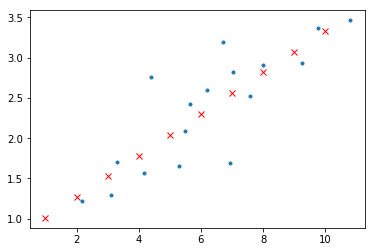

In [6]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = model.predict(x)
plt.plot(X, Y, '.')
plt.plot(x, y, 'rx')

##### 예측을 하는데 아까 훈련시킨 model에 x값만 넣어주면 y값이 나옴! (print(y)를 통해서 확인해보기)
##### 두개의 plot을 비교함 (r을 붙이면 빨간색으로 나옴)
##### plot에서 prediction을 하는 부분은 무조건 일직선으로 나옴. 이 선을 보니 기존의 데이터를 잘 설명하고 있다는 것을 알 수 있음.

##### model prediction은 a, b를 구하면서 model이 딱 정해진 상태에서, x값을 줘서 y값을 얻는 것을 말함
##### x에 임의로 값을 주고 model.predict(x)를 통해 y값을 구함

# what are a and b in y = ax + b?

In [7]:
weight = model.layers[0].get_weights()
print(weight)

[array([[0.25832585]], dtype=float32), array([0.7513658], dtype=float32)]


##### a와 b 값을 구하는 방법
##### [0]을 붙이는 것은 화살표 덩어리에서 여러개의 a와 b가 있을 수 있는데 그 중 첫번째 값을 불러오는 것!
##### 이 값을 weight라는 변수에 담음 -> 출력하면 list안에 array의 형태로 나옴 (확인해보기!)

##### 수학적으로 a와 b 값이 궁금하면 이 식을 통해 알 수 있음!
##### layer는 동그라미 그림에서 coloumn에 있는 여러 동그라미들을 말함 (층위) -> 여기서는 하나만 만들었음
##### 첫번째 layer에서 weights(parameter값, 화살표값)를 모두 가져오라는 의미 -> 여기서는 a, b 두개를 가져옴